<a href="https://colab.research.google.com/github/rht6226/DL/blob/main/Mobile_Price_Range_Prediction_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Predictor using Keras

## Data Preprocessing

We will be predicting Mobile data prices based on features.

First we need to Load the file from google drive for this, we will be using colab notebook's feature to locally mount the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The we read the training set.

As the training set is in CSV format, we will use pandas for reading it.

In [36]:
import numpy as np
import pandas as pd

# Training set import
trainingSet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/MobilePriceRangeDataset/train.csv')
trainingSet.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


We now need to split the table into two sets for training our model. We will split this table into two different numpy Arrays X and Y.

This code will make two arrays X and y. X contains features and y will contain  the classes.

In [ ]:
#Changing pandas dataframe to numpy array
X = trainingSet.iloc[:,:20].values
y = trainingSet.iloc[:,20:21].values

This step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. 

 **It is an important step**

 It is mainly required in case the dataset features vary a lot. As in our case, the value of battery power is in the 1000’s and clock speed is less than 3. 
 
**So if we feed unnormalized data to the neural network, the gradients will change differently for every column and thus the learning will oscillate**.

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# X after normalisation
X[0]

array([-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
       -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
       -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
        0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664])

Next step is to **one hot encode** the classes. *One hot encoding is a process to convert integer classes into binary values.* 

Consider an example, let’s say there are 3 classes in our dataset namely 1,2 and 3. Now **we cannot directly feed this to neural network** so we convert it in the form:
1- 1 0 0
2- 0 1 0
3- 0 0 1

Now there is one unique binary value for the class. 

The new array formed will be of shape (n, number of classes), where n is the number of samples in our dataset. We can do this using simple function by sklearn

In [ ]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

# Output after One hot Encoding
y[0]

array([0., 1., 0., 0.])

Now our dataset is processed and ready to feed in the neural network.

Generally, it is better to *split data into training and testing data.*

Training data is the data on which we will train our neural network. Test data is used to check our trained neural network. This data is totally new for our neural network and if the neural network performs well on this dataset, it shows that there is no overfitting.


This will split our dataset into training and testing. Training data will have 90% samples and *test data will have 10% samples*. This is specified by the **test_size** argument.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

## Building Neural Network

Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.


**In our dataset, the input is of 20 values and output is of 4 values. So the input and output layer is of 20 and 4 dimensions respectively.**


In our neural network, we are using two hidden layers of 16 and 12 dimension.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

**Sequential** specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.

**model.add** is used to add a layer to our neural network. We need to specify as an argument what type of layer we want.

The **Dense** is used to specify the fully connected layer. The arguments of Dense are output dimension (Number of hidden units in this layer) which is 16 in the first case, *input dimension which is 20 for input dimension* and the activation function to be used which is relu in this case.

The second layer is similar, *we dont need to specify input dimension as we have defined the model to be sequential so keras will automatically consider input dimension to be same as the output of last layer* i.e 16. 

In the third layer(output layer) the output dimension is 4(number of classes).

The output layer takes different activation functions and for the case of multiclass classification, it is **softmax**.

In [ ]:
# Compiling the model by specifying which loss function to be used, which optimizer and which metrics to judge the network on.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Here loss is cross entropy loss. **Categorical_crossentropy** specifies that we have **multiple classes**. The optimizer is Adam. 

Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.



## Training the model

Training step is simple in keras. **model.fit** is used to train it.



Here we need to specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size.

It **returns the history** of model training. **History consists of model accuracy and losses after each epoch**. We will visualize it later.

Usually, **the dataset is very big** and we **cannot fit complete data at once** so we use batch size. This **divides our data into batches** each of size equal to batch_size. Now only this number of samples will be **loaded into memory and processed**. Once we are done with one batch it is **flushed from memory** and the next batch will be processed.

Let's get to training....

In [ ]:
# history = model.fit(X_train, y_train, epochs=100, batch_size=64)

We can use test data as validation data and can check the accuracies after every epoch. 

This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. 

We can do this by changing fit function as shown below. Now the training step output will also contain validation accuracy.

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 1.4413 - accuracy: 0.2539 - val_loss: 1.4075 - val_accuracy: 0.2600
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.4003 - accuracy: 0.2744 - val_loss: 1.3849 - val_accuracy: 0.2800
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3729 - accuracy: 0.3028 - val_loss: 1.3651 - val_accuracy: 0.3100
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3465 - accuracy: 0.3350 - val_loss: 1.3447 - val_accuracy: 0.3200
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3160 - accuracy: 0.3644 - val_loss: 1.3142 - val_accuracy: 0.3700
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2764 - accuracy: 0.4017 - val_loss: 1.2746 - val_accuracy: 0.3950
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2280 - accuracy: 0.4467 - val_loss: 1.2254 - val_accuracy: 0.4300
Epoch 8/100
2

After 100 epochs the neural network will be trained. The training accuracy is reached 99.3 % so our model is trained.

Too many Epoch will lead to overfitting.


**Now we can check the model’s performance on test data:**

The below step is inverse one hot encoding process. We get integer labels using this step. 

We then predict on test data using a simple method of keras, model.predict(). 

It will take the test data as input and will return the prediction outputs as softmax.

Then We conver the softmax into label and predict the accuracy by comparing it to the input labels

We get an accuracy of 94.0%.

In [ ]:
y_pred = model.predict(X_test)

#Converting predictions to class label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test-label to class label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

# Predicting Accuracy
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 94.0


## Visualisation

Our model is working fine. Now we will visualize training and validation losses and accuracies.

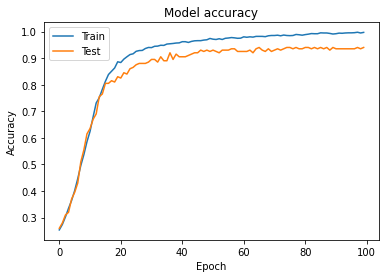

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

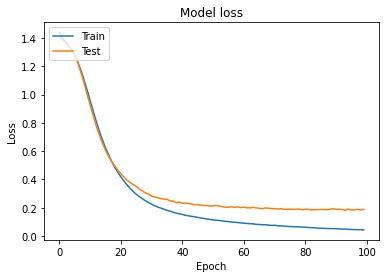

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## More testing 

We will do manual prediction on additional tests to ensure that the model is good.

In [37]:
# Load the testing set

testingSet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/MobilePriceRangeDataset/test.csv')
testingSet.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [ ]:
# Normalise

testX = testingSet.iloc[:,:20].values
sc = StandardScaler()
tX = sc.fit_transform(testX)

# X after normalisation
tX[0]

array([-1.73031962e+00, -4.75451314e-01,  9.68495997e-01,  3.12600690e-01,
        9.66558833e-01,  2.10867604e+00, -9.74329379e-01, -1.58126872e+00,
       -1.48724678e+00,  1.53553472e+00, -5.80670762e-01,  9.76025990e-01,
       -9.26990483e-01,  3.91911646e-01,  1.22937276e+00,  1.15782393e-03,
        3.97362775e-01, -1.65335542e+00, -1.76021608e+00,  1.00000000e+00])

In [ ]:
# Predict

y_pred2 = model.predict(tX)

#Converting predictions to class label
pred2 = list()
for i in range(len(y_pred2)):
    pred2.append(np.argmax(y_pred2[i]))

testingSet["Price Class"] = np.array(pred2)
testingSet.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price Class
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,2
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,0
5,6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0,2
7,8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1,2
8,9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0,1
9,10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1,0
